In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['target', 'feature_names', 'DESCR', 'data'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [1]:
bos = pd.DataFrame(boston.data)
bos.head()

NameError: name 'pd' is not defined

In [7]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.target[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression objects
lm = LinearRegression()

In [24]:
X_train = X[:-50]
X_test = X[-50:]
y_train = bos.PRICE[:-50]
y_test = bos.PRICE[-50:]


lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print("intercept : \n", lm.intercept_)
print("coef : \n", lm.coef_)

intercept : 
 35.5957129437
coef : 
 [ -1.04755725e-01   4.91233643e-02   3.24299720e-02   2.51517135e+00
  -1.76585750e+01   3.81259444e+00   1.06438518e-02  -1.43651798e+00
   3.60959247e-01  -1.54635990e-02  -9.13025678e-01   9.94705988e-03
  -5.55769911e-01]


In [27]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns= ['features', 'estimatedCoefs'])

,features,estimatedCoefs
0,CRIM,-0.104756
1,ZN,0.049123
2,INDUS,0.032430
3,CHAS,2.515171
4,NOX,-17.658575
5,RM,3.812594
6,AGE,0.010644
7,DIS,-1.436518
8,RAD,0.360959
9,TAX,-0.015464


In [28]:
mse = np.mean((y_test - lm.predict(X_test))**2)
print(mse)

10.9665431668


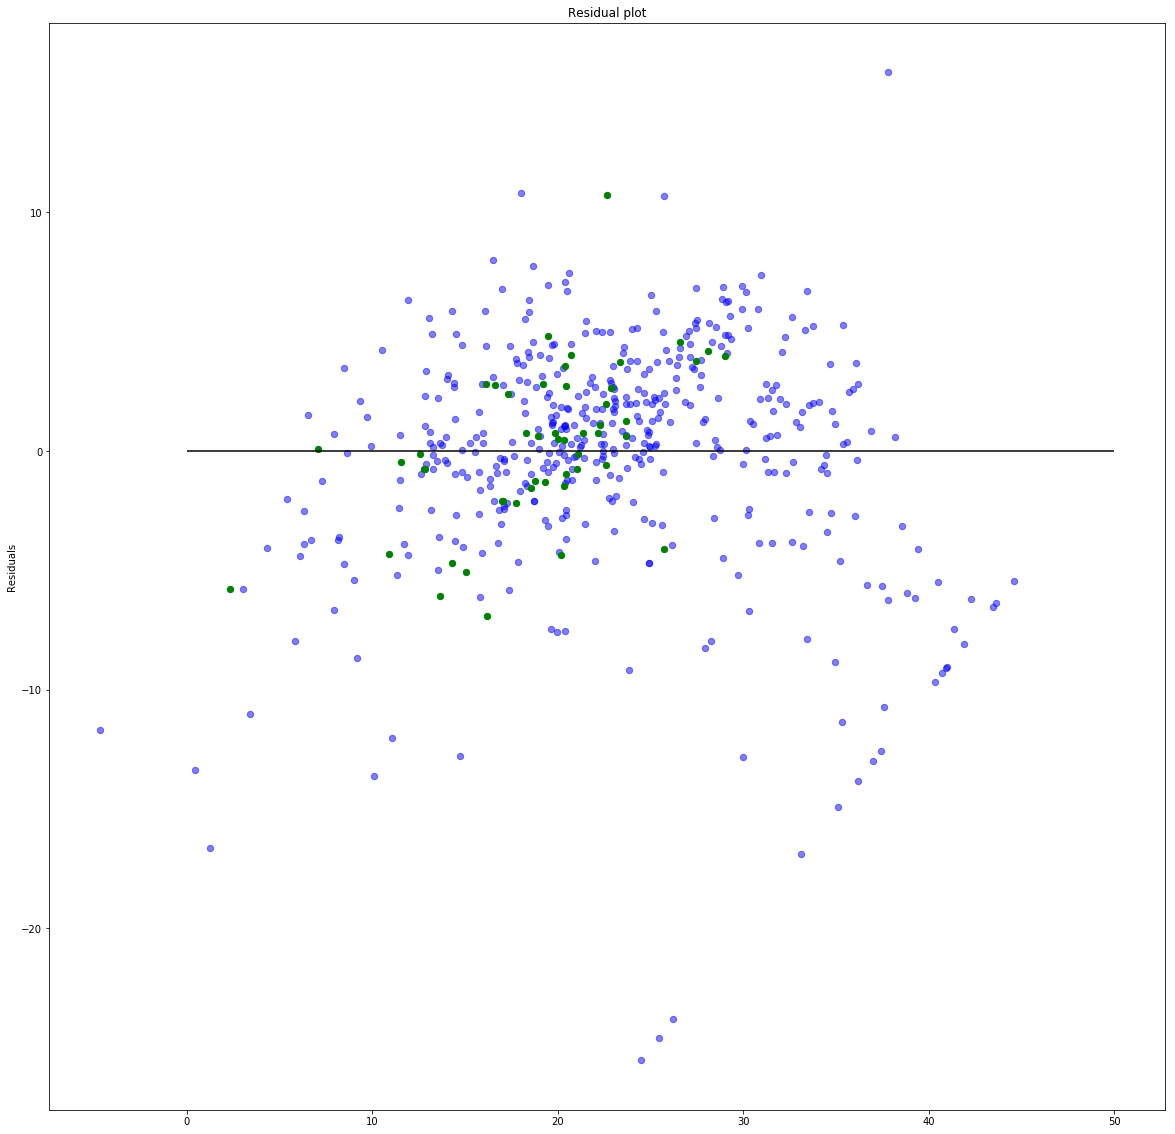

In [40]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha = 0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax = 50)
plt.title("Residual plot")
plt.ylabel("Residuals")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()